### 1. Data Understanding and Exploration

In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set.
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Data Cleaning

In [4]:
# Calculate the sum of null entries in each column
null_sum = df.isnull().sum()
# Filter columns with non-zero null entries
non_zero_null_columns = null_sum[null_sum > 0]

print("Columns with non-zero null entries and their counts:")
print(non_zero_null_columns)


Columns with non-zero null entries and their counts:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
#Drop the column with null value % more than 30%
drop_col = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
df=df.drop(drop_col,axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
null_sum = df.isnull().sum()
# Filter columns with non-zero null entries
non_zero_null_columns = null_sum[null_sum > 0]

print("Columns with non-zero null entries and their counts:")
print(non_zero_null_columns)

Columns with non-zero null entries and their counts:
LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [7]:
# converting few columns to to categorical
col2 = ['Id','MSSubClass','YearRemodAdd','YrSold','YearBuilt','GarageYrBlt','MoSold']
df[col2]=df[col2].astype('object')
df[col2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   object
 1   MSSubClass    1460 non-null   object
 2   YearRemodAdd  1460 non-null   object
 3   YrSold        1460 non-null   object
 4   YearBuilt     1460 non-null   object
 5   GarageYrBlt   1379 non-null   object
 6   MoSold        1460 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


In [8]:
#replace the missing values of continuos column with median
# Find continuous columns with missing values
cont_columns = df.select_dtypes(include=['float64', 'int64']).columns
missing_cont_columns = df[cont_columns].columns[df[cont_columns].isnull().any()]

for column in missing_cont_columns:
    df[column] = df[column].apply(lambda x: df[column].median() if pd.isnull(x) else x)

    
cont_columns = df.select_dtypes(include=['float64', 'int64'])
cont_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [9]:
df['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [10]:
# converting few columns to to categorical
col2 = ['OverallCond','BsmtHalfBath','OverallQual','BsmtFullBath','GarageCars','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
        'Fireplaces']

df[col2]=df[col2].astype('object')
df[col2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallCond   1460 non-null   object
 1   BsmtHalfBath  1460 non-null   object
 2   OverallQual   1460 non-null   object
 3   BsmtFullBath  1460 non-null   object
 4   GarageCars    1460 non-null   object
 5   BedroomAbvGr  1460 non-null   object
 6   KitchenAbvGr  1460 non-null   object
 7   TotRmsAbvGrd  1460 non-null   object
 8   Fireplaces    1460 non-null   object
dtypes: object(9)
memory usage: 102.8+ KB


In [11]:
#replace the missing values of categorical column with mode
# Find continuous columns with missing values
cat_columns = df.select_dtypes(include=['object']).columns
missing_cat_columns = df[cat_columns].columns[df[cat_columns].isnull().any()]

for column in missing_cat_columns:
    df[column] = df[column].apply(lambda x: df[column].mode() if pd.isnull(x) else x)

cat_columns = df.select_dtypes(include=['object'])
cat_columns.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,2,TA,TA,Y,5,2007,WD,Normal
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,2,TA,TA,Y,9,2008,WD,Normal
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,3,TA,TA,Y,2,2006,WD,Abnorml
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,3,TA,TA,Y,12,2008,WD,Normal


In [12]:
#Adding new column 'house age'
df['house_age']=df['YrSold']-df['YearBuilt']

In [13]:
#Adding new column 'Yr_since_renewal'
df['Yr_since_renewal']=df['YrSold']-df['YearRemodAdd']

In [14]:
df['Yr_since_renewal']=df[col2].astype('int64')
df['house_age']=df[col2].astype('int64')
df=df.drop(columns=['YrSold','YearRemodAdd','YearBuilt'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   object 
 1   MSSubClass        1460 non-null   object 
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   Utilities         1460 non-null   object 
 9   LotConfig         1460 non-null   object 
 10  LandSlope         1460 non-null   object 
 11  Neighborhood      1460 non-null   object 
 12  Condition1        1460 non-null   object 
 13  Condition2        1460 non-null   object 
 14  BldgType          1460 non-null   object 
 15  HouseStyle        1460 non-null   object 
 16  OverallQual       1460 non-null   object 


In [15]:
cont_columns = df.select_dtypes(include=['float64', 'int64']).columns
cont_columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'house_age', 'Yr_since_renewal'],
      dtype='object')

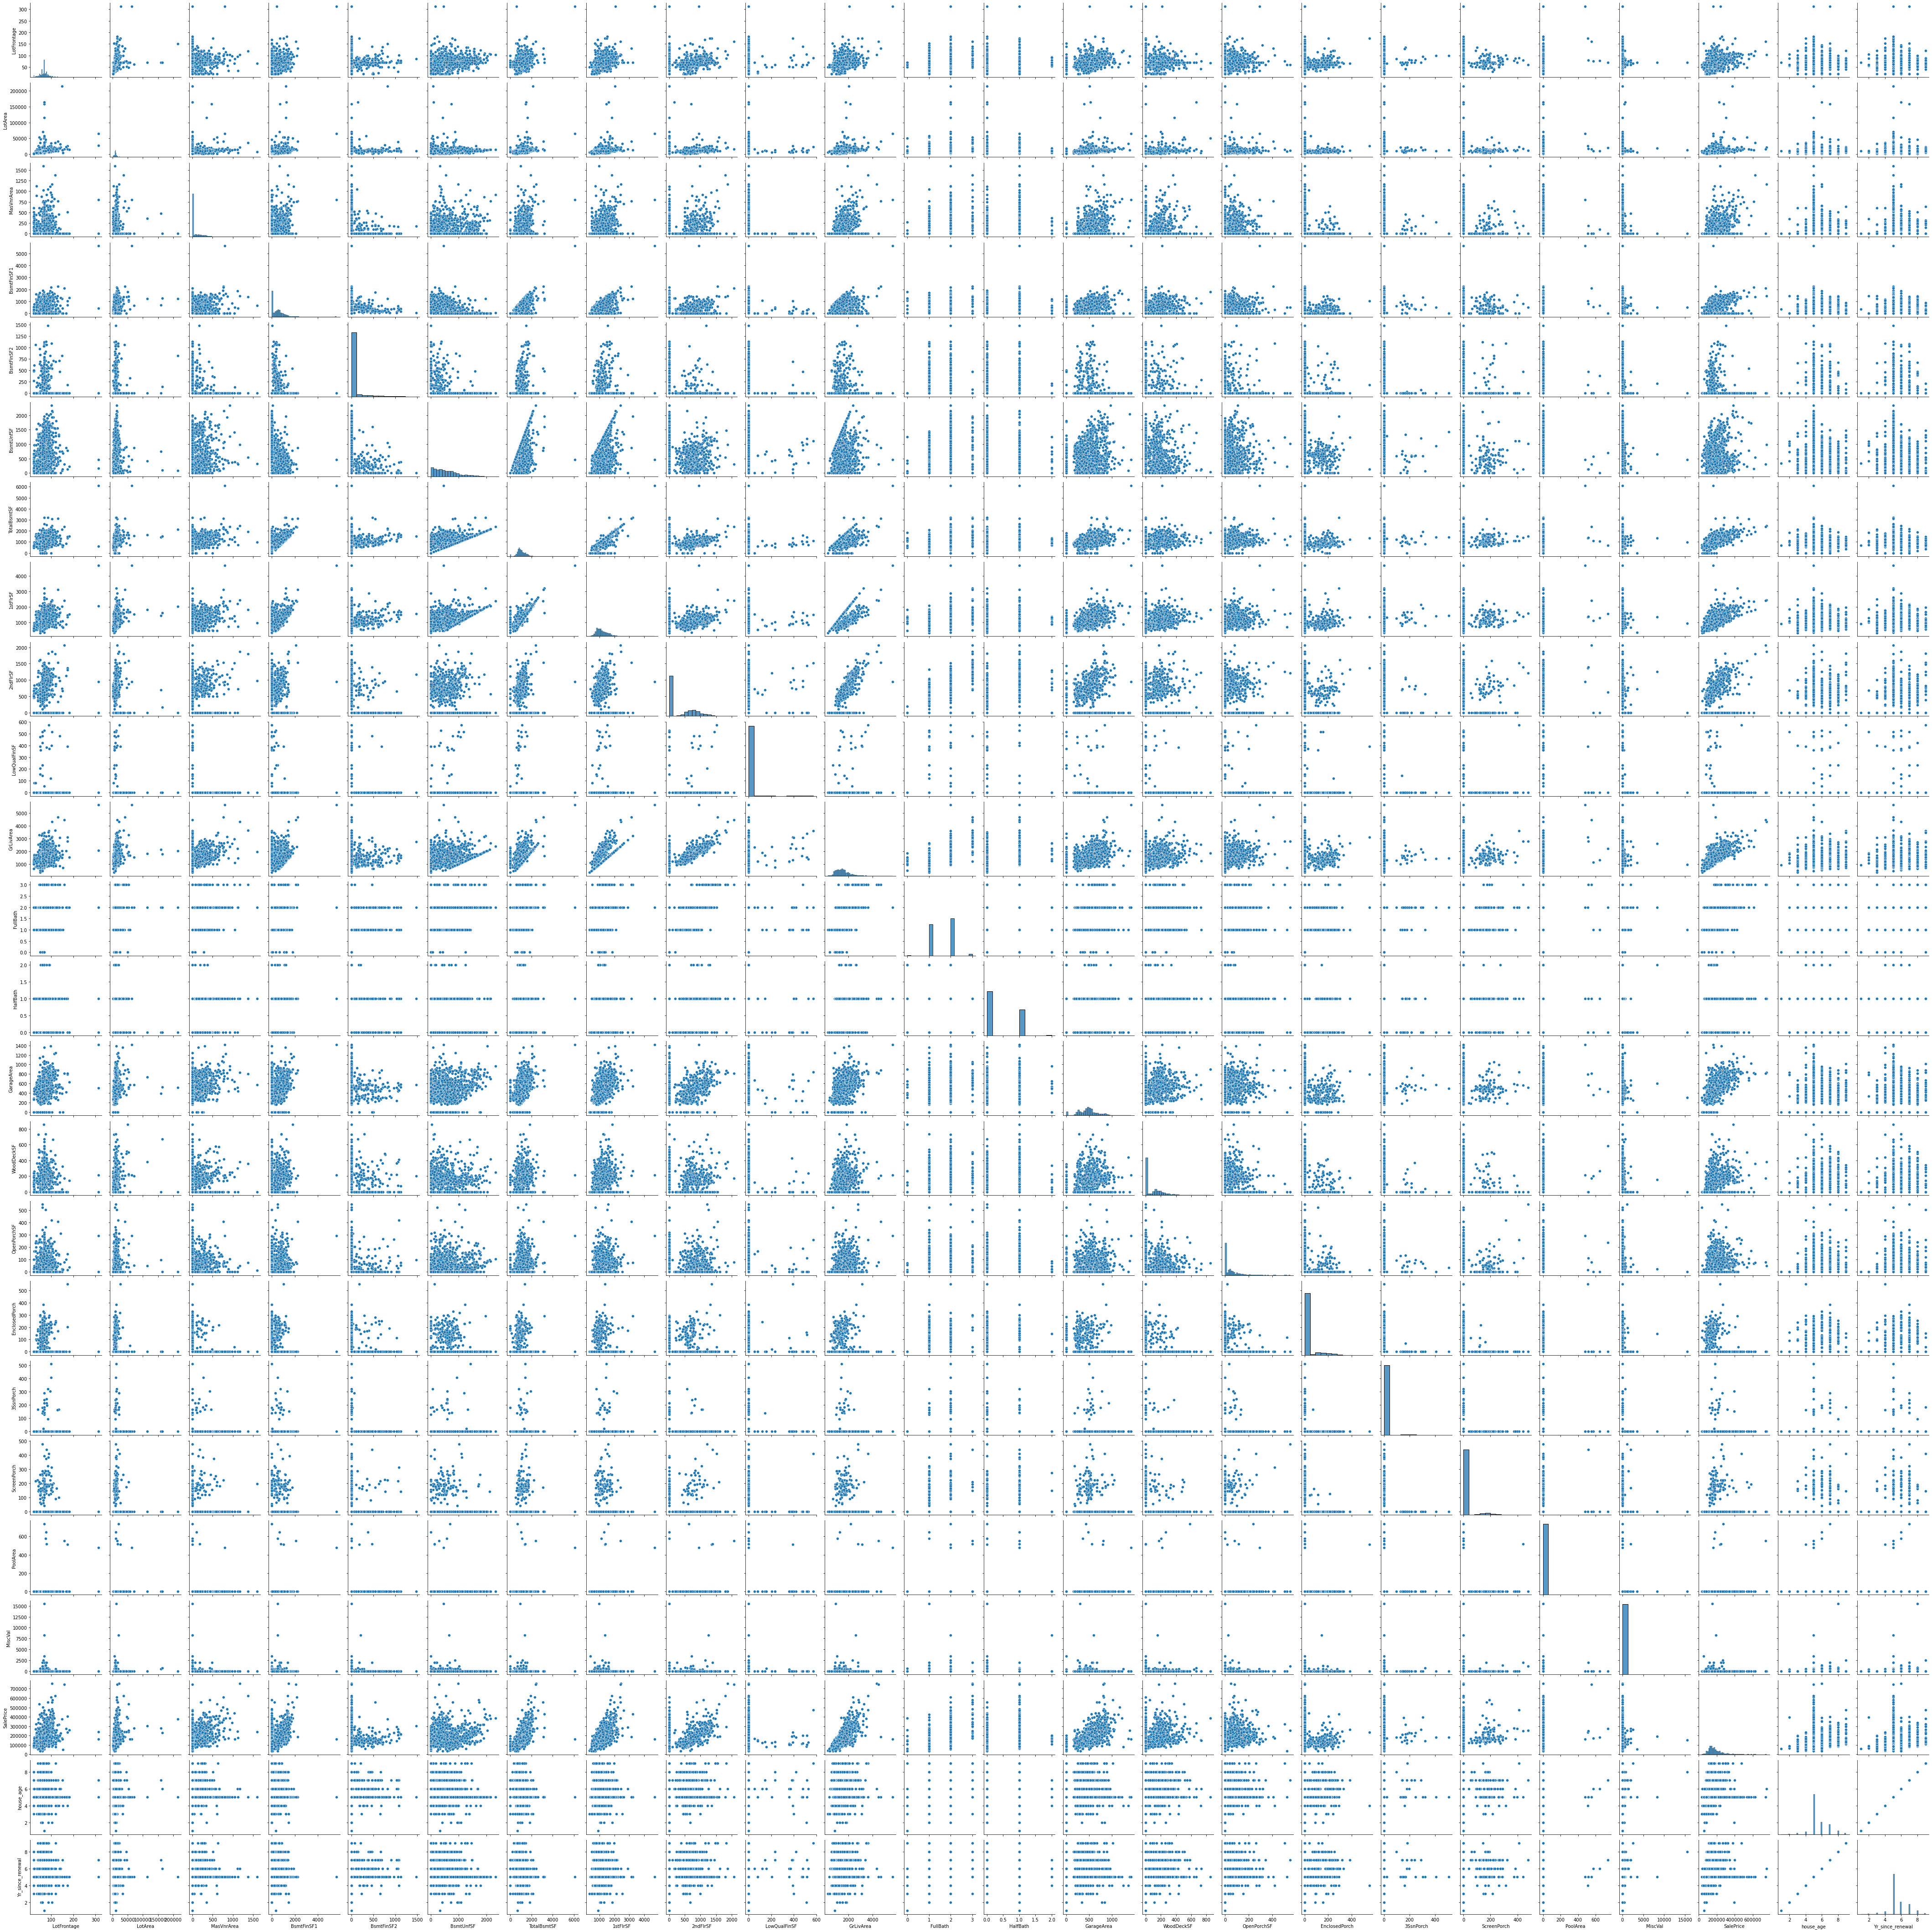

In [16]:
#Visulaizing the continuous variables using pair plot
sns.pairplot(df[cont_columns])
plt.show()

In [17]:
#Correleation between continuous variables
cor = df[cont_columns].corr()

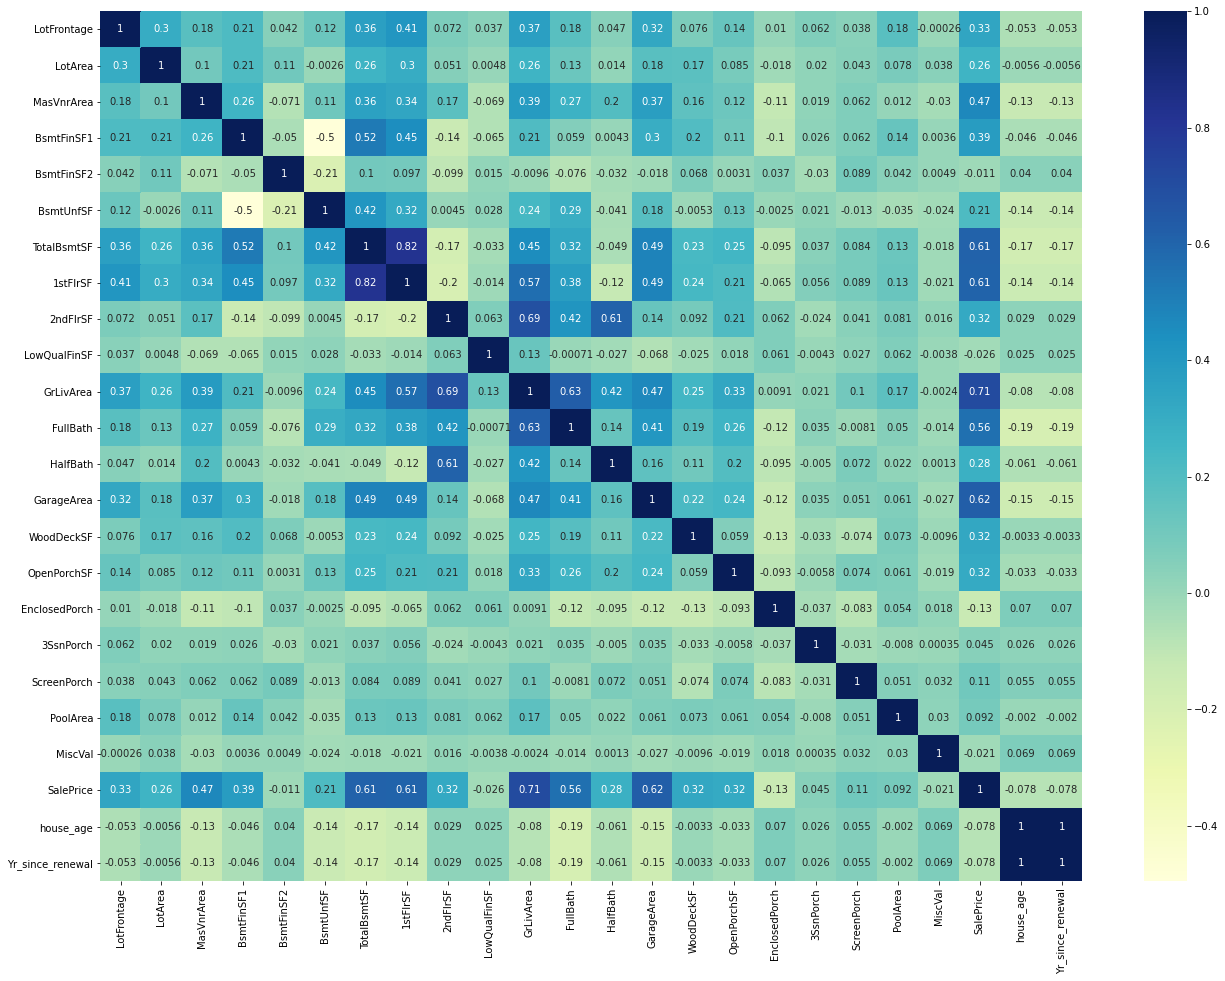

In [18]:
#Visulazing using heatmap
plt.figure(figsize=(22,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [19]:
# Map the 'MoSold' Column with respective month acronym
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['MoSold'] = df['MoSold'].map(month_mapping)
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [26]:
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns.unique()

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
df=df.drop(columns=['Id'],axis=1)

In [22]:
dummy_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition']

## 3. Data Preparation 

###  Create dummy columns for categorical variables

In [95]:
dum_col=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond',
       'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd','ExterQual','ExterCond', 'Foundation','Heating', 'HeatingQC',
       'CentralAir','BsmtFullBath', 'BsmtHalfBath','CentralAir',
       'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces','PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition']

In [100]:
dummy15=pd.get_dummies(df[dum_col],drop_first =True)

In [98]:
#MasVnrType
#BsmtCond
#BsmtQual 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' 'Electrical','GarageType', 'GarageYrBlt', 'GarageFinish',
      # 'GarageCars', 'GarageQual', 'GarageCond'

In [101]:
dummy15.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [122]:
y=df['SalePrice']

In [128]:
df=df.drop(['SalePrice'],axis=1)
# drop categorical variables 
X = df.drop(list(cat_columns), axis=1)

In [129]:
# concat dummy variables with X
X = pd.concat([X, dummy15], axis=1)

In [130]:
print(X.head())
print(y.head())

   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0         

## 3. Model Building and Evaluation

In [131]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [133]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [134]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [135]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

371493673200860.8
[ 2.50563773e+03  5.76476613e+03  2.71154717e+03  1.49581544e+15
  5.29061324e+14  1.44914313e+15 -1.43877428e+15 -7.28795574e+15
 -8.22943825e+15 -9.16642797e+14  9.90636122e+15  1.48475000e+03
 -1.69125000e+02  4.31431250e+03  1.17503125e+03  2.36415625e+03
 -1.12250000e+02  1.34800000e+03  1.23612500e+03  3.64150000e+03
  6.83531250e+02  1.50544234e+15 -4.23611412e+15 -1.98775000e+03
 -1.53250000e+02 -1.79512500e+03 -1.88573438e+03  6.51312500e+03
  3.88875000e+02 -5.87025000e+03 -1.75025000e+03 -2.19450000e+03
  5.99860169e+15 -2.80562500e+02  3.27181250e+03  2.88000000e+02
  7.09154746e+13  7.59100000e+03  5.00287500e+03  1.85525000e+04
  1.63073750e+04  1.43862500e+03  1.76250000e+02  7.45562500e+02
 -4.39187500e+02  3.22312500e+02 -1.38250000e+02  1.21012500e+03
 -1.06325000e+03  2.09668750e+03 -6.87375000e+02  2.90750000e+02
  1.22250000e+02  1.66537500e+03 -1.35759375e+03  2.32562500e+02
 -5.42000000e+02 -6.93437500e+02 -6.52812500e+02 -1.16612500e+03
  3.133

In [136]:
from sklearn.metrics import r2_score, mean_squared_error

In [137]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score of train data: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score of test data: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS of train data: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS of test data: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE of train data: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE of test data: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score of train data:  0.9514619588434036
R2 score of test data:  -3.8187108410014615e+22
RSS of train data:  309706620936.8633
RSS of test data:  1.0763848097315428e+35
MSE of train data:  303336553.31720203
MSE of test data:  2.4574995655971297e+32


### Ridge Regressionm

In [188]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [183]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [201]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.17507499e+03  3.01368128e+03  3.66475267e+03  4.07125349e+03
  8.04055671e+02  2.15326247e+02  4.74520380e+03  6.34446085e+03
  4.07073274e+03 -5.58178230e+02  7.99752218e+03  4.86748355e+03
  2.44623606e+03  4.99372097e+03  2.45777953e+03  1.36414989e+03
 -3.71265333e+02  1.24356212e+03  1.65543307e+03 -3.92332996e+02
  2.07440847e+02  1.49692624e+03  1.49692624e+03 -1.58417462e+03
  2.36901205e+01 -2.44655502e+02 -4.75367182e+02  8.20882816e+02
  2.08166351e+02 -1.27086926e+02 -3.00501474e+02 -3.42617376e+02
 -4.24767103e+02 -1.01107021e+03 -1.46441225e+03 -1.33817235e+02
 -7.18981672e+02  5.02385321e+02  2.20766307e+00  1.34406586e+03
 -7.77034351e+02  5.54309418e+02  5.11595529e+02 -1.49554794e+03
 -8.18238122e+02  1.40431104e+03  8.47570603e+02  1.14132897e+03
 -1.04489051e+03  2.13219440e+03 -5.90898924e+02 -2.29299639e+02
 -5.54814882e+01  1.13874927e+03  2.12819406e+02  2.48537874e+02
 -2.78652116e+02 -9.41595627e+01  1.10064488e+03 -6.67209706e+02
  2.35906965e+03 -3.24611

In [202]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score of train data: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score of test data: ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS of train data: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS of test data: ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE of train data: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE of test data: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score of train data:  0.8907790991827189
R2 score of test data:  0.8597191513905227
RSS of train data:  696905670722.6292
RSS of test data:  395411385743.70984
MSE of train data:  682571665.7420462
MSE of test data:  902765720.8760499


### lasso Regression

In [203]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [204]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [205]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [206]:
lasso.coef_

array([ 0.00000000e+00,  3.85151902e+03,  1.79742065e+03,  5.97378175e+03,
        8.11703731e+02, -0.00000000e+00,  4.12850903e+03,  9.66541888e+02,
        0.00000000e+00, -1.95158238e+03,  2.67964796e+04,  4.05547148e+03,
        9.64200168e+02,  4.55055923e+03,  1.20472053e+03,  4.17245219e+02,
       -5.59918637e+01,  1.21386467e+03,  1.44031380e+03, -3.86934201e+01,
        0.00000000e+00,  5.48022411e+03,  3.60027699e-11, -4.84516550e+02,
        0.00000000e+00,  0.00000000e+00, -5.56287610e+02,  0.00000000e+00,
       -2.84731246e+02, -1.49892808e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -8.84457897e+02, -1.35942458e+03,  0.00000000e+00,
       -9.03338461e+02,  0.00000000e+00,  0.00000000e+00,  1.52708260e+03,
       -0.00000000e+00,  3.66663406e+02,  1.51057699e+02, -5.15377034e+02,
       -2.75863671e+02,  1.16799546e+02,  6.90471683e+01,  4.53761232e+02,
       -4.49312399e+02,  2.06863772e+03, -4.21331221e+01, -0.00000000e+00,
        0.00000000e+00,  

In [207]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score of train data: ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score of test data: ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS of train data: ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS of test data: ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE of train data: ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE of test data: ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score of train data:  0.9246016812457244
R2 score of test data:  0.8509301226653946
RSS of train data:  481093961957.9956
RSS of test data:  420185131140.8374
MSE of train data:  471198787.4221309
MSE of test data:  959326783.4265695


In [208]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.514620e-01,8.907791e-01,9.246017e-01
1,R2 Score (Test),-3.818711e+22,8.597192e-01,8.509301e-01
2,RSS (Train),3.097066e+11,6.969057e+11,4.810940e+11
3,RSS (Test),1.076385e+35,3.954114e+11,4.201851e+11
4,MSE (Train),1.741656e+04,2.612607e+04,2.170711e+04
5,MSE (Test),1.567641e+16,3.004606e+04,3.097300e+04


it can be seen from the above table ‘R2 score’ of Ridge regression is slightly higher than lasso regression in the test data set, also difference in ‘R2 Score’ of train vs test data set is minimum in the case of  Ridge regression.
RSS and MSE value of test data is slightly less in Ridge than in lasso regression.
Hence, in this case, Ridge regression is the better-suited model.


## changes in the coefficients after regularization

In [209]:
betas = pd.DataFrame(index=X.columns)

In [210]:
betas.rows = X.columns

In [211]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [212]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,2.505638e+03,1175.074989,0.000000e+00
LotArea,5.764766e+03,3013.681281,3.851519e+03
MasVnrArea,2.711547e+03,3664.752669,1.797421e+03
BsmtFinSF1,1.495815e+15,4071.253489,5.973782e+03
BsmtFinSF2,5.290613e+14,804.055671,8.117037e+02
BsmtUnfSF,1.449143e+15,215.326247,-0.000000e+00
TotalBsmtSF,-1.438774e+15,4745.203801,4.128509e+03
1stFlrSF,-7.287956e+15,6344.460851,9.665419e+02
2ndFlrSF,-8.229438e+15,4070.732741,0.000000e+00
LowQualFinSF,-9.166428e+14,-558.178230,-1.951582e+03
